In [1]:
#importing useful files
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import backend
import random

#importing dataset and removing uncessary columns which cannot be really understood by the algorithm
df = pd.read_excel('aggregate_ic.xlsx')
df.drop('Sample No.',axis =1 ,inplace= True)
df.sample(frac=1)
print(df.head())

   Clay  Silt  Sand    Bd    SOM    pH    WSA
0  11.0  63.0  26.0  1.90  0.243  7.89  18.47
1  15.0  64.0  21.0  1.97  0.270  7.58  13.97
2  14.0  59.0  27.0  1.89  0.390  7.82  16.57
3   7.0  55.0  38.0  1.94  0.310  7.86  17.54
4  16.0  56.0  28.0  1.93  0.240  7.24  19.48


In [2]:
#for plotting of the graphs of the different variables from the dataset

# fig,ax = plt.subplots(1,1)
# ax.set_xlabel('Index')
# ax.set_ylabel('pH Value')
# # plt.scatter(df.index,df['Clay'],c='brown')
# # plt.scatter(df.index,df['Silt'],c='blue',label='Silt%')
# # plt.scatter(df.index,df['Sand'],c= 'green')
# # plt.scatter(df.index,df['Bd'],c='red')
# # plt.scatter(df.index,df['SOM'],c='blue')
# plt.scatter(df.index,df['pH'],c='purple')

# fig.tight_layout()
# fig.savefig('ph.svg',dpi = 700)


In [3]:
#We are going to predict the WSA%
X=np.array(df.drop('WSA',axis=1))
y=np.array(df['WSA'])

#making the model 
n_cols= X.shape[1] 
model = Sequential()
layer1= model.add(Dense(4,activation = 'linear',input_shape=(n_cols,)))
#output layer
final_layer= model.add(Dense(1,activation ='linear'))

#compile

model.compile(optimizer='adam',loss=['mae'], metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# #training model
# early_stopper= EarlyStopping(monitor='loss',patience=4)
history=model.fit(X,y,validation_split=0.2, epochs=1000,verbose='auto' ,shuffle= True)



Epoch 1/1000
2/2 [==============================] - 0s 126ms/step - loss: 14.1269 - rmse: 15.9810 - val_loss: 6.7451 - val_rmse: 8.7554
Epoch 2/1000
2/2 [==============================] - 0s 19ms/step - loss: 13.7475 - rmse: 15.5623 - val_loss: 7.0828 - val_rmse: 9.2028
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 13.4215 - rmse: 15.2061 - val_loss: 7.5318 - val_rmse: 9.6782
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 13.0424 - rmse: 14.8133 - val_loss: 7.9735 - val_rmse: 10.1747
Epoch 5/1000
2/2 [==============================] - 0s 23ms/step - loss: 12.6985 - rmse: 14.4922 - val_loss: 8.4160 - val_rmse: 10.6970
Epoch 6/1000
2/2 [==============================] - 0s 17ms/step - loss: 12.3325 - rmse: 14.1554 - val_loss: 8.8739 - val_rmse: 11.2395
Epoch 7/1000
2/2 [==============================] - 0s 20ms/step - loss: 11.9972 - rmse: 13.8848 - val_loss: 9.4001 - val_rmse: 11.7984
Epoch 8/1000
2/2 [==============================] 

<ipython-input-4-29d351a18ed9>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


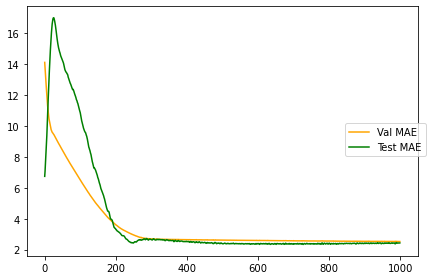

In [4]:
#plotting
fig,ax=plt.subplots()
ax.plot(history.history['loss'],c='orange',label= 'Val MAE')
ax.plot(history.history['val_loss'],c='green',label='Test MAE')
fig.legend(loc='right')
fig.show()

fig.tight_layout()
fig.savefig('MAE.svg',dpi=400)

In [5]:
#to save model for further use
# model.save('model_linear_activation_4neurons.h5')
loaded_model=load_model('model_linear_activation_4neurons.h5')

In [6]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
pred= np.array(loaded_model.predict(X))
target = np.array(df['WSA'])
#r^2
from sklearn.metrics import r2_score,mean_absolute_error

r2= r2_score(target,pred)
print("Coefficient of Determination is "+str(r2))

mae = mean_absolute_error(target,pred)

print("Mean Absolute Error is "+ str(mae))

# self made rmse function 
def rmse(predictions, targets):
    return np.sqrt((predictions - targets) ** 2).mean()

rmse_value =rmse(target,pred)


print("RMSE Value is "+str(rmse_value))

#adjusted R^2
n= 73
p=7
x= 1-r2
y=(n-1)/(n-p-1)

adj_r2= 1-(x*y)

print('Adjusted R^2 is '+str(adj_r2))

# for extracting the weights of all layers
# weights = [layer.get_weights() for layer in model.layers]
# print(weights)

Coefficient of Determination is 0.39326314760147574
Mean Absolute Error is 2.519219337881428
RMSE Value is 3.7320783319471476
Adjusted R^2 is 0.32792225580471157


In [7]:
#weights and biases in the final layer
weights=[]
bias=[]

weights.append( loaded_model.layers[1].get_weights()[0])
bias.append(loaded_model.layers[1].get_weights()[1])
print("weights in final layer are " + str(weights))
print("bias is in final layer is " + str(bias))

weights in final layer are [array([[ 0.12739624],
       [-0.30603534],
       [ 0.41059205],
       [-0.9697767 ]], dtype=float32)]
bias is in final layer is [array([-0.05503452], dtype=float32)]


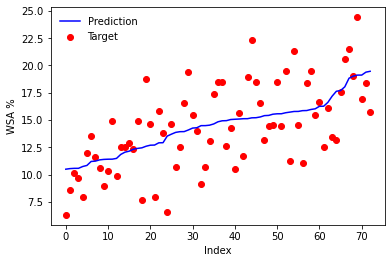

In [8]:
fig , ax= plt.subplots()
index= list(range(len(pred)))
ax.set_xlabel("Index")
ax.set_ylabel("WSA %")

pred_target=pd.DataFrame(list(zip(pred,target)))
pred_target.head()
pred_target.sort_values(by=0,inplace = True)
plt.plot(index,pred_target[0],c='blue',label= "Prediction")
plt.scatter(index,pred_target[1],c='red',label='Target')
plt.legend(loc='upper left',frameon = False)
plt.show(fig)
fig.savefig('finalgraphann.svg',dpi = 600)
